# Did you pee in the sea?
* Topics: Chemistry, water molecules of the world, binomial probability, Avogadro constant, isotopes, unit conversion, for loops in Python

## Task
* Even if you have never involved yourself in this polluting and abominable activity, I swear that thousands if not millions are doing it right now.
* The chemistry experiment goes like this.
  1. You pee in the glass (300 ml) and pour it in the ocean
  2. Then you wait until your pee perfectly mixes in all the oceans of the world (This would take impossibly long, so we just assume the perfect mixing).
  3. And then you draw the same glass of water from the sea.


## Questions
* What is the average number of molecules of your pee in that glass of water?
* What is the probability of having more than 2300 molecules of your pee in the glass?
* If you take one of the strongest poisons we know of, $\mathrm{^{210}Po}$, how many atoms in the glass will kill you?

In [1]:
import scipy.stats as stats
import scipy.constants as const

import numpy as np
import matplotlib.pyplot as plt

# import matplotlib as mpl
plt.rcParams['figure.figsize'] = [8,6] # graph size
plt.rcParams['lines.linewidth'] = 3  # line width
plt.rcParams['lines.markersize'] = 10  # size of point markers
plt.rcParams['xtick.labelsize'] = 12  # font size of x axis ticks
plt.rcParams['ytick.labelsize'] = 12 # font size of y axis ticks
plt.rcParams['axes.labelsize'] = 'larger'  # font size of the axes labels

# uncomment the command below to find out all possible parameters of graph you can change/set.
# plt.rcParams.keys()

## Let's first see how much water is there in the World's oceans?
Thanks to [wikipedia page](https://en.wikipedia.org/wiki/Ocean), it is not hard to find:

* approximately 1.335 billion cubic kilometers
* cubic km is a cube with a side of 1km and we have 1 335 000 000 of them

In [2]:
## what is the conversion factor to convert cubic km to liters
## hint 1 liter is 1 cubic dm
km3_to_liters = 10000**3

# now calculate how many litres all the ocean contain (use your km3_to_liters factor)
water_total = 1.335e9 * km3_to_liters  # in liters

### But we are asking about number of molecules, so we need to find out how many water molecules are in 1 liter?

That comes at the price of knowledge what a unit mol is. Definition is quite arbitrary actually (and has changed throughout the history):
  * 1 mole is the number of atoms in 12 g of carbon $\mathrm{^{12}_{6}C}$. It is called **Avogadro's constant**, and you can guess that it must be a big number since atoms are pretty small. We will see soon. 
  * And 12 is also *standard atomic weight* of carbon. 
  * It is not exactly 12, because of different isotopes of $\mathrm{_{6}C}$ appearing in pure carbon samples. And because of some other recent, but for us insignicicant [technical changes](https://en.wikipedia.org/wiki/2019_redefinition_of_the_SI_base_units#Mole).
  * The important for us is the following. We can take *standard atomic weight* for 2 hydrogen and 1 oxygen atoms in our $\mathrm{H_{2}O}$ molecule and get very precisely weight of 1 mole of $\mathrm{H_{2}O}$:
    
$\mathrm{m_{water}=18.02\,g\cdot{mol^{-1}}}$,
  together with density of water approximately $\mathrm{1000\,g/l}$, you can calculate how many moles are in 1 liter of water.
  
### Sidenotes
  1. The 6 in $\mathrm{^{12}_{6}C}$ is often omitted because calling an element carbon implies it has 6 protons. $\mathrm{^{12}C}$ signifies that this atom has also 6 neutrons (6 protons + 6 neutron = 12 nucleons). Changing the number of neutrons and keeping the element the same (== the same number of protons) gives you so called isotopes of particular element.
  2. There are 15 isotopes of carbon, $\mathrm{^{8}C}$ - $\mathrm{^{22}C}$, meaning carbons with 2 upto 16 neutrons. Only 2 are stable and 3 are naturally detectable. The rest is possible to prepare artificially, but show rapid radioactive decay.
  3. The above means that there is one carbon isotope, which appears in nature but is not stable, it is $\mathrm{^{14}C}$. Since its radioactive decay 'can take' thousands of years, it is used in so called [radiocarbon dating](https://en.wikipedia.org/wiki/Radiocarbon_dating). Technique which allows to precisely determine the age of archeological artifacts from organic matter such as bones, paper scrolls etc.

### Based on the above, calculate how many moles are in 1 litre of water

In [3]:
# mols of H2O in 1 liter
moles_per_liter = 1000/18.02

In [4]:
# Avogadro constant, as well as most of other constants are accessable from scipy.constants module.
# which I imported as const
const.Avogadro

6.02214076e+23

notation `e+23` is called scientific, and means adding number of zeros after the symbol `e` to the number before the `e`

### As I said above, 1 mole contains Avogadro's constant ($\mathrm{N_A}$) of particles
  * So how many water molecules are there in the oceans?
  * Multiply liters in ocean with moles per liter -> moles in ocean -> times $\mathrm{N_A}$ -> number of molecules.

In [5]:
# total amount of molecules in oceans
molecules_water = water_total * moles_per_liter * const.Avogadro

### Now we do the same for a glass of lukewarm pee

In [6]:
# in molecules right away
molecules_glass = 0.3 * moles_per_liter * const.Avogadro

In [7]:
# print the number
molecules_glass

1.002576153163152e+25

In [8]:
## Create the following output
print(f' Total molecules of water in the oceans: {molecules_water}')
print(f' Total molecules in a glass of your pee: {molecules_glass}')

 Total molecules of water in the oceans: 4.461463881576027e+46
 Total molecules in a glass of your pee: 1.002576153163152e+25


That is quite a number of molecules, 4e+46 means that the 4 is followed by 46 zeros.

## Time to answer the first question, how many pee molecules are we going to draw back into our glass from the perfectly mixed oceans?

In [9]:
# average is simply ratio of pee vs ocean * times the number of molecules in the glass (that part we already calculated)
pee_av = molecules_glass/molecules_water * (0.3 * moles_per_liter * const.Avogadro)
print(round(pee_av))

2253


### This is huge number until you realize how many normal water molecules are in your glass per one of the pee.

In [10]:
# 1 pee molecule per how many normal water ones?
round(molecules_glass/pee_av)

4450000000000001048576

In deed your pee got pretty diluted. The whole confusion for our heads is, that the molecules are so bloody small, therefore there are so many in one glass.

## Now comes the part of playing with probabilities.
  * We want to find out what is the probability of having > 2300 pee molecules in the glass.
  * For that purpose, we are going to use **Binomial distribution**, from `scipy.stats.binom()`
  * It is used for experiments drawing `n` samples out of total population of `N` possibilities. 
  * Additionally, we need only two possible results, success (drawwing pee molecule) or failure (drawing ocean molecule). 
  * Strictly speaking Binomial statistic works only if we would **REPLACE** the molecules we draw.
  * But in case of big N `N>>n` (which is certainly true here), simple Binomial statistic will work perfectly.
  * The strictly correct statistic is called **Hypergeometric distribution**, from `scipy.stats.hypergeom()`
  
### I will show how different they work on a quick example here
  * Let's have a bag of 20 molecules, 5 poisonous and 15 safe ones.
  * If we draw the poisonous one, we lost the game.
  * We are going to draw 5 times, what is our chance of survival
  
1. First if we always replace the molecule we draw, we will always have a bag of 20 (5+15)
2. Each round, our chance of drawing safe molecule is 15/20.
3. Since we do 5 rounds, we calculate:

In [11]:
prob_binom = (15/20)*(15/20)*(15/20)*(15/20)*(15/20)  ## or shorter way: (15/20)**5
print(prob_binom)

0.2373046875


## Binomial distribution
### $Pr(k,n,p) = \binom{n}{k}p^k(1-p)^{n-k}$, 

where $\binom{n}{k}$ is a binomial coefficient

### $\binom{n}{k}=\dfrac{n!}{k!(n-k)!}$

`k` is how many success draws I want

`n` is total number of draws

`p` is the probability of success draw (here prob to draw a safe molecule)

In [12]:
# The same think can do Python right away using pmf method of the binom distribution
# pmf stands for probability mass function
stats.binom.pmf(k=5, n=5, p=15/20)

0.2373046875

We have almost 24% chance of survival.

## It is clear we are replacing molecules, because our probability is always 15/20
  * If we DO NOT replace, then after drawing first safe molecule, there would be only 19 molecules left left in the bag, 5 poisonous and 14 safe
  * Therefore in the next round, our success probability drops to only 14/19

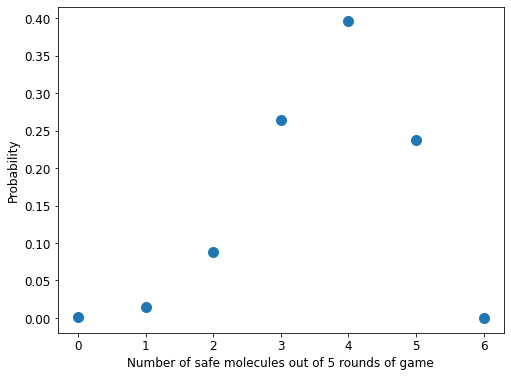

In [13]:
# Now calculate probabilities for all possible outcomes
hits = [0, 1, 2, 3, 4, 5, 6]  # how many safe molecules I draw in 5 rounds

plt.plot(hits, stats.binom.pmf(hits, 5, 15/20), 'o', ms=10)
plt.xlabel('Number of safe molecules out of 5 rounds of game')
plt.ylabel('Probability')
plt.show()

I added number 6 just to confirm that the probability goes to zero. It has to, since we do only 5 draws.

Also note, that the most probable result is drawing 4 safe molecules (40% chance)

In [14]:
# print the values to actually see them
stats.binom.pmf(hits, 5, 15/20)

array([0.00097656, 0.01464844, 0.08789062, 0.26367187, 0.39550781,
       0.23730469, 0.        ])

### Every proper probability distribution needs to have sum of all the probabilities equal to 1
 * Note: For continuous probability distribution, the sum would be called integral, in case you hear it somewhere
 * Our outcomes are discrete, 0,1,2 etc. nothing inbetween.

In [15]:
# try to check that yourself (sum of all the values from the graph using sum() method).
sum(stats.binom.pmf(hits, 5, 15/20))

0.9999999999999998

Almost perfect 1, now second example with not replacing molecules.

## Hypergeometric distribution ([wiki page](https://en.wikipedia.org/wiki/Hypergeometric_distribution))

In [16]:
# chance of survival in 5 draws
prob_hyper = (15/20)*(14/19)*(13/18)*(12/17)*(11/16)
print(prob_hyper)

0.19369195046439627


In [17]:
stats.hypergeom.pmf(k=5, M=20, n=15, N=5)

0.19369195046439577

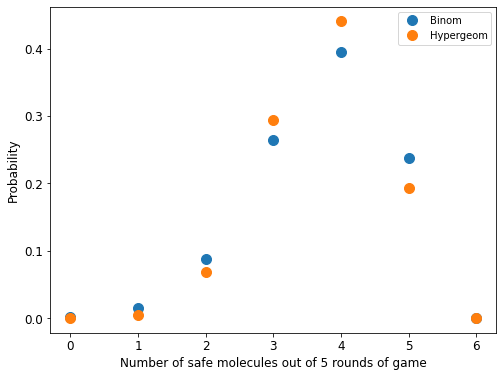

In [18]:
plt.plot(hits, stats.binom.pmf(hits, 5, 15/20), 'o', ms=10, label='Binom')
plt.plot(hits, stats.hypergeom.pmf(hits, M=20, n=15, N=5), 'o', ms=10, label='Hypergeom')
plt.xlabel('Number of safe molecules out of 5 rounds of game')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [19]:
## Check again the sum of all probabilities
sum(stats.hypergeom.pmf(k=hits, M=20, n=15, N=5))

0.999999999999998

## These distributions look quite different
 * IN this case we would not like to use Binomial instead of correct Hypergeometric
 * I said that for a large enough bag of molecules (Big `M` compare to my poisonous ones, `N`), I can use binomial though
 * The question is how can we as non-experts figure out, what `M` value is big enough?
 * Answer is testing it with your python skills!!!

In [22]:
## difference based on changing only total number of molecules in the bag
# empty list
diff = []

# My goal is to calculate difference in binom and hypergeom based on the total amount 
    # of molecules in the bag
# Perfect example for a for loop, repeat certain operations while changing one parameter
# The one parameter is total number of molecules (n_mol)
# I take it from range 20 to 2000
# and for every integer from this range I calculate:
# difference between the binom and hypergeom
# takean absolute values, because differences can be pos/neg and cancel out
# and I sum all those differences for each x value (from the plot above, ie. hits)
# And this sum is a single number describing how different the two distributions are.
# The smaller the difference is, the closer match the distributions are.
# And last operation is to append my calculated value to the list
# So my list contains difference for each size of a bag (from 20 to 2000 molecules),
    # always containg 5 poisonous

for n_mol in range(20,2000):
    diff.append(sum(abs(stats.binom.pmf(hits, 5, (n_mol-5)/n_mol) - \
                        stats.hypergeom.pmf(hits, M=n_mol, n=n_mol-5, N=5))))

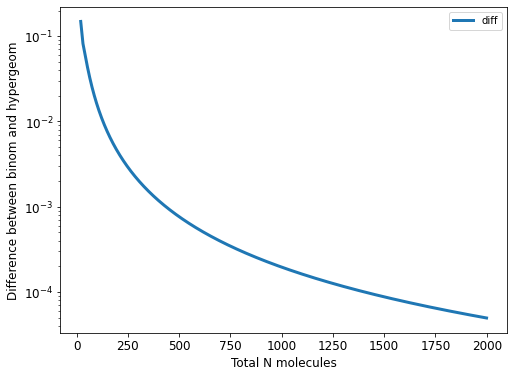

In [21]:
plt.plot(range(20,2000), diff, label='diff')
plt.yscale('log')
plt.xlabel('Total N molecules')
plt.ylabel('Difference between binom and hypergeom')
plt.legend()
plt.show()

You can pick yourself when is it good enough to use `binomial` instead of `hypergeom`, around M=500 seems pretty safe, which means M 100x times higher than our 5 poisonous molecules (N).

Note 1: Y axis is logarithmic, for M=500, we increased M 25x from 20, and we decreased the difference in distributions (y axis) around 300x

Note: For different number of poisonous molecules, the plot would be different!!

## It's clear we are fine with using `stats.binom()` for our PEE vs SEA molecules.
  * End of the sidetrack comapring `binom` vs. `hypergeom()` and back to the **second question**.
  * What is the probability of having more than 2300 molecules of your pee in the glass?

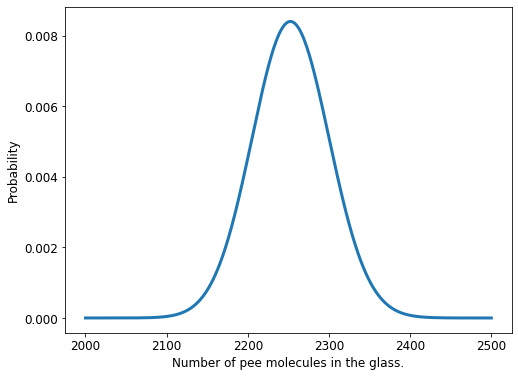

In [24]:
# create an array of 501 points between 2000 and 2500
x = np.linspace(2000, 2500, 501)  # careful, we need all the integer values.

# for each x calculate binom probability (binom.pmf()) and plot it
n, p = molecules_glass, molecules_glass/molecules_water
plt.plot(x, stats.binom.pmf(x, n, p))

plt.xlabel('Number of pee molecules in the glass.')
plt.ylabel('Probability')
plt.show()

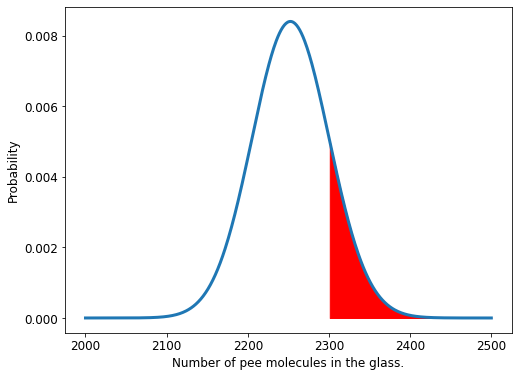

In [25]:
# Now we visualize part of the distribution for results 2300 molecules and more.
plt.plot(x, stats.binom.pmf(x, n, p))
plt.fill_between(x[np.argmin(abs(2301-x)):],
                 stats.binom.pmf(x[np.argmin(abs(2301-x)):], n, p),
                 color='red')
plt.xlabel('Number of pee molecules in the glass.')
plt.ylabel('Probability')
plt.show()

As we have already mentioned summing all the probabilities gives us 1, so that it covers every possible outcome.

We are interested for those outcomes, for pee molecules more than 2300, therefore summing all the points on the distribution will give us the probability

CAREFUL: This works only because we really sampled with our x axis values all the points, always adding plus one. If you skip some, the sum method will not work.

In [28]:
# summing all the outcomes' probabilities, 2301, 2302, 2303....
sum(stats.binom.pmf(x[np.argmin(abs(2301-x)):], n, p))

0.1583758548435811

Almost 16% chance, you draw more than 2300 molecules

### We can do this in a more elegant fashion, using so called *cummulative distribution function* `stats.binom.cdf()`
  * Which does exactly what we need, it goes over our x axis (number of drawn pee molecules) and at each step adds the probability
  * That's why this function always goes from zero to 1, for any kind of probability task.

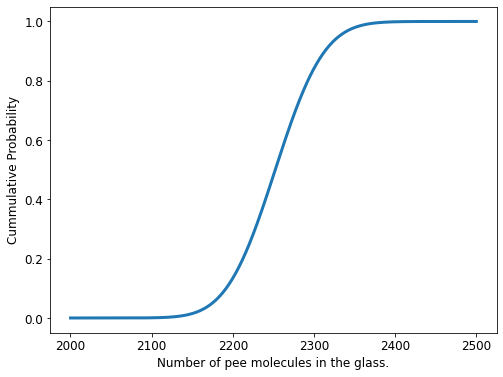

In [29]:
plt.plot(x, stats.binom.cdf(x, n, p))

plt.xlabel('Number of pee molecules in the glass.')
plt.ylabel('Cummulative Probability')
plt.show()

Since we need 2300 and more, we take the value on y axis for 2301, that is the prob of drawing 2300 and or any number less.

And we need to subtract it from one, to get 2301 and more.

In [41]:
1-stats.binom.cdf(2301, n, p)

0.15337278018710887

## Bonus:
* Since we know the whole distribution, we can retrieve so called standard deviation
* That gives us interval with probably results
* Whenever you measure something, it is good to know, what is your statistical error
* It means, what kind of variations are just due to random variations
* By definition, you have ~68% chance of drawing somewhere between 2253-std  --  2253+std molecules at each try

In [43]:
# If we repeat our exxperiment many times, we should arrive on the result
# 2253 +- 47
stats.binom.std(n,p)

47.46556772511793

## Now what is the strongest poison in the world?
  * We can take [Polonium](https://en.wikipedia.org/wiki/Polonium#Biology_and_toxicity) $\mathrm{^{210}Po}$
  * It takes only $\mathrm{1\mu{g}}$ of it to kill you
  * So how many atoms does it correspond to and how does that number compare to our 2253 pee molecules in the glass?  

In [37]:
# what is the atomic mass for Polonium?
mass = 209  # this you can understand as g/mol

In [38]:
# so 1 micro gram is in moles?
po_lethal_dose = const.Avogadro/209e6

In [39]:
po_lethal_dose

2881407062200957.0

Wow, that is a lot of atoms right...

In [40]:
# can you express, how many times more is this than 2253?
round(po_lethal_dose/2253)

1278920134133

Huge number again. Which makes the same point as we already mentioned and is our conclusion:
  
## Conclusion:
  * 2253 pee molecules in your glass may feel disgusting, but it is truly miniscule number
  * Simply because molecules are so unimaginably small and numerous
  * In other words, Avogadro's constant is big :)
  
## Questions:
1. There are many, but I let you run your own imagination, what you could calculate based on this notebook. Let me know your best ideas.

# Good job everyone!!